In [63]:
!pip install snscrape

In [64]:
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('covid since:2022-01-01 until:2022-02-28').get_items()):
    if i>500:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
df = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [65]:
tweets_list2

[[datetime.datetime(2022, 2, 27, 23, 59, 59, tzinfo=datetime.timezone.utc),
  1498085536363421697,
  "@JennaEllisEsq This is so typical of republicans. When the country should be pulling together for a cause like Covid and now the Ukraine, they're looking for ways to shame Biden. This is all you have. trump still doesn't want you back.",
  'BBullard007'],
 [datetime.datetime(2022, 2, 27, 23, 59, 58, tzinfo=datetime.timezone.utc),
  1498085532240609280,
  'Karnataka reports 366 new cases of COVID-19, 17\xa0deaths https://t.co/T8kuNHjKrE',
  'ThriftWallet'],
 [datetime.datetime(2022, 2, 27, 23, 59, 57, tzinfo=datetime.timezone.utc),
  1498085525995069450,
  '@surtoonline não foi dessa vez o beijo triplo eu você e o covid',
  'dannepereira4'],
 [datetime.datetime(2022, 2, 27, 23, 59, 57, tzinfo=datetime.timezone.utc),
  1498085525600849921,
  '@AguirreWrathofG Ci mancherebbe! Il punto è che ho commentato un suo post sul covid, mentre ora lei ha spostato il discorso sul green pass. Rispett

In [66]:
df

,Datetime,Tweet Id,Text,Username
0,2022-02-27 23:59:59+00:00,1498085536363421697,@JennaEllisEsq This is so typical of republica...,BBullard007
1,2022-02-27 23:59:58+00:00,1498085532240609280,"Karnataka reports 366 new cases of COVID-19, 1...",ThriftWallet
2,2022-02-27 23:59:57+00:00,1498085525995069450,@surtoonline não foi dessa vez o beijo triplo ...,dannepereira4
3,2022-02-27 23:59:57+00:00,1498085525600849921,@AguirreWrathofG Ci mancherebbe! Il punto è ch...,DANY77710263
4,2022-02-27 23:59:56+00:00,1498085525047021569,@MalditaRulo COVID?,x_maurox
...,...,...,...,...
496,2022-02-27 23:55:28+00:00,1498084399346339847,@RealBirdLawyer “Patented covid” lmao,Tigerjunky9311
497,2022-02-27 23:55:28+00:00,1498084398087819268,@FANate6 @aaronkowbel @jkenney I have 2 childr...,cfilipow_88
498,2022-02-27 23:55:27+00:00,1498084395181174786,China Clings To COVID-19 Zero - Analysis\nhttp...,EurasiaReview
499,2022-02-27 23:55:27+00:00,1498084394074001408,Poutine a vaincu le Covid https://t.co/SoBA1ce...,PauldeMaisonneu


In [67]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')

In [68]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2022-02-27 23:59:59+00:00,1498085536363421697,@JennaEllisEsq This is so typical of republica...,BBullard007
1,2022-02-27 23:59:58+00:00,1498085532240609280,"Karnataka reports 366 new cases of COVID-19, 1...",ThriftWallet
2,2022-02-27 23:59:57+00:00,1498085525995069450,@surtoonline não foi dessa vez o beijo triplo ...,dannepereira4
3,2022-02-27 23:59:57+00:00,1498085525600849921,@AguirreWrathofG Ci mancherebbe! Il punto è ch...,DANY77710263
4,2022-02-27 23:59:56+00:00,1498085525047021569,@MalditaRulo COVID?,x_maurox


In [69]:
df.shape

(501, 4)

In [70]:
df.info

<bound method DataFrame.info of                      Datetime             Tweet Id  \
0   2022-02-27 23:59:59+00:00  1498085536363421697   
1   2022-02-27 23:59:58+00:00  1498085532240609280   
2   2022-02-27 23:59:57+00:00  1498085525995069450   
3   2022-02-27 23:59:57+00:00  1498085525600849921   
4   2022-02-27 23:59:56+00:00  1498085525047021569   
..                        ...                  ...   
496 2022-02-27 23:55:28+00:00  1498084399346339847   
497 2022-02-27 23:55:28+00:00  1498084398087819268   
498 2022-02-27 23:55:27+00:00  1498084395181174786   
499 2022-02-27 23:55:27+00:00  1498084394074001408   
500 2022-02-27 23:55:26+00:00  1498084391226155013   

                                                  Text         Username  
0    @JennaEllisEsq This is so typical of republica...      BBullard007  
1    Karnataka reports 366 new cases of COVID-19, 1...     ThriftWallet  
2    @surtoonline não foi dessa vez o beijo triplo ...    dannepereira4  
3    @AguirreWrathofG C

In [71]:
np.sum(df.isnull().any(axis=1))

0

In [72]:
!pip install plotly

In [73]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [74]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')

In [75]:
#cleaning tweets 

In [76]:
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+','',text) # removing Retweets
    text= re.sub('https?:\/\/\S+','',text) #removing links
    return text

In [77]:
df['Text']= df['Text'].apply(cleanTxt)

In [78]:
df

,Datetime,Tweet Id,Text,Username
0,2022-02-27 23:59:59+00:00,1498085536363421697,This is so typical of republicans. When the c...,BBullard007
1,2022-02-27 23:59:58+00:00,1498085532240609280,"Karnataka reports 366 new cases of COVID-19, 1...",ThriftWallet
2,2022-02-27 23:59:57+00:00,1498085525995069450,não foi dessa vez o beijo triplo eu você e o ...,dannepereira4
3,2022-02-27 23:59:57+00:00,1498085525600849921,Ci mancherebbe! Il punto è che ho commentato ...,DANY77710263
4,2022-02-27 23:59:56+00:00,1498085525047021569,COVID?,x_maurox
...,...,...,...,...
496,2022-02-27 23:55:28+00:00,1498084399346339847,“Patented covid” lmao,Tigerjunky9311
497,2022-02-27 23:55:28+00:00,1498084398087819268,I have 2 children 5 and under and they will...,cfilipow_88
498,2022-02-27 23:55:27+00:00,1498084395181174786,China Clings To COVID-19 Zero - Analysis\n\nBy...,EurasiaReview
499,2022-02-27 23:55:27+00:00,1498084394074001408,Poutine a vaincu le Covid via,PauldeMaisonneu


In [79]:
df.drop(['Datetime','Tweet Id','Username'], axis=1)

,Text
0,This is so typical of republicans. When the c...
1,"Karnataka reports 366 new cases of COVID-19, 1..."
2,não foi dessa vez o beijo triplo eu você e o ...
3,Ci mancherebbe! Il punto è che ho commentato ...
4,COVID?
...,...
496,“Patented covid” lmao
497,I have 2 children 5 and under and they will...
498,China Clings To COVID-19 Zero - Analysis\n\nBy...
499,Poutine a vaincu le Covid via


In [80]:
analysis.sentiment     #subjectivity is also called opinion mining

Sentiment(polarity=1.0, subjectivity=0.3)

In [81]:
analysis=TextBlob("Today was the best day ")

In [82]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity']= df['Text'].apply(getSubjectivity)
df['Polarity']= df['Text'].apply(getPolarity)

In [83]:
df

,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity
0,2022-02-27 23:59:59+00:00,1498085536363421697,This is so typical of republicans. When the c...,BBullard007,0.250000,-0.083333
1,2022-02-27 23:59:58+00:00,1498085532240609280,"Karnataka reports 366 new cases of COVID-19, 1...",ThriftWallet,0.454545,0.136364
2,2022-02-27 23:59:57+00:00,1498085525995069450,não foi dessa vez o beijo triplo eu você e o ...,dannepereira4,0.000000,0.000000
3,2022-02-27 23:59:57+00:00,1498085525600849921,Ci mancherebbe! Il punto è che ho commentato ...,DANY77710263,0.300000,-0.200000
4,2022-02-27 23:59:56+00:00,1498085525047021569,COVID?,x_maurox,0.000000,0.000000
...,...,...,...,...,...,...
496,2022-02-27 23:55:28+00:00,1498084399346339847,“Patented covid” lmao,Tigerjunky9311,1.000000,0.600000
497,2022-02-27 23:55:28+00:00,1498084398087819268,I have 2 children 5 and under and they will...,cfilipow_88,0.375000,-0.125000
498,2022-02-27 23:55:27+00:00,1498084395181174786,China Clings To COVID-19 Zero - Analysis\n\nBy...,EurasiaReview,0.333333,0.333333
499,2022-02-27 23:55:27+00:00,1498084394074001408,Poutine a vaincu le Covid via,PauldeMaisonneu,0.000000,0.000000


In [84]:
df.pop('Username')

0          BBullard007
1         ThriftWallet
2        dannepereira4
3         DANY77710263
4             x_maurox
            ...       
496     Tigerjunky9311
497        cfilipow_88
498      EurasiaReview
499    PauldeMaisonneu
500       tinhoheadley
Name: Username, Length: 501, dtype: object

In [85]:
df.pop('Tweet Id')

0      1498085536363421697
1      1498085532240609280
2      1498085525995069450
3      1498085525600849921
4      1498085525047021569
              ...         
496    1498084399346339847
497    1498084398087819268
498    1498084395181174786
499    1498084394074001408
500    1498084391226155013
Name: Tweet Id, Length: 501, dtype: int64

In [86]:
df

,Datetime,Text,Subjectivity,Polarity
0,2022-02-27 23:59:59+00:00,This is so typical of republicans. When the c...,0.250000,-0.083333
1,2022-02-27 23:59:58+00:00,"Karnataka reports 366 new cases of COVID-19, 1...",0.454545,0.136364
2,2022-02-27 23:59:57+00:00,não foi dessa vez o beijo triplo eu você e o ...,0.000000,0.000000
3,2022-02-27 23:59:57+00:00,Ci mancherebbe! Il punto è che ho commentato ...,0.300000,-0.200000
4,2022-02-27 23:59:56+00:00,COVID?,0.000000,0.000000
...,...,...,...,...
496,2022-02-27 23:55:28+00:00,“Patented covid” lmao,1.000000,0.600000
497,2022-02-27 23:55:28+00:00,I have 2 children 5 and under and they will...,0.375000,-0.125000
498,2022-02-27 23:55:27+00:00,China Clings To COVID-19 Zero - Analysis\n\nBy...,0.333333,0.333333
499,2022-02-27 23:55:27+00:00,Poutine a vaincu le Covid via,0.000000,0.000000


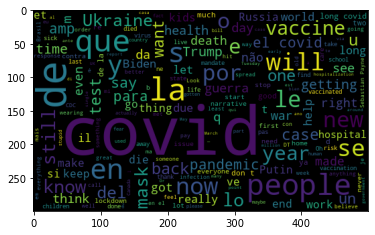

In [87]:
allwords= ' '.join([i for i in df['Text']])
Cloud= WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [88]:
# Create a function to compute negative neutral and positive

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Datetime,Text,Subjectivity,Polarity,Analysis
0,2022-02-27 23:59:59+00:00,This is so typical of republicans. When the c...,0.250000,-0.083333,Negative
1,2022-02-27 23:59:58+00:00,"Karnataka reports 366 new cases of COVID-19, 1...",0.454545,0.136364,Positive
2,2022-02-27 23:59:57+00:00,não foi dessa vez o beijo triplo eu você e o ...,0.000000,0.000000,Neutral
3,2022-02-27 23:59:57+00:00,Ci mancherebbe! Il punto è che ho commentato ...,0.300000,-0.200000,Negative
4,2022-02-27 23:59:56+00:00,COVID?,0.000000,0.000000,Neutral
...,...,...,...,...,...
496,2022-02-27 23:55:28+00:00,“Patented covid” lmao,1.000000,0.600000,Positive
497,2022-02-27 23:55:28+00:00,I have 2 children 5 and under and they will...,0.375000,-0.125000,Negative
498,2022-02-27 23:55:27+00:00,China Clings To COVID-19 Zero - Analysis\n\nBy...,0.333333,0.333333,Positive
499,2022-02-27 23:55:27+00:00,Poutine a vaincu le Covid via,0.000000,0.000000,Neutral


In [89]:
df[df['Analysis']=='Neutral']

,Datetime,Text,Subjectivity,Polarity,Analysis
2,2022-02-27 23:59:57+00:00,não foi dessa vez o beijo triplo eu você e o ...,0.0,0.0,Neutral
4,2022-02-27 23:59:56+00:00,COVID?,0.0,0.0,Neutral
5,2022-02-27 23:59:56+00:00,covid tirou folga pro carnaval?? única explica...,0.0,0.0,Neutral
7,2022-02-27 23:59:55+00:00,$SPY just like the Covid crash instigated an i...,0.0,0.0,Neutral
8,2022-02-27 23:59:55+00:00,Claro que esta pandemia cambio los seres human...,0.0,0.0,Neutral
...,...,...,...,...,...
492,2022-02-27 23:55:32+00:00,essas horas no carnaval antes do covid eu ja t...,0.0,0.0,Neutral
493,2022-02-27 23:55:32+00:00,_dz me dio covid por la fiesta del sabado pasa...,0.0,0.0,Neutral
494,2022-02-27 23:55:31+00:00,Tá de brincadeira! kkkkkkkkkkk Esse imbecil f...,0.0,0.0,Neutral
495,2022-02-27 23:55:30+00:00,"Vou começar a ir i swear, agora que apanhei c...",0.0,0.0,Neutral


In [90]:
df['Analysis'].value_counts()

Neutral     229
Positive    161
Negative    111
Name: Analysis, dtype: int64

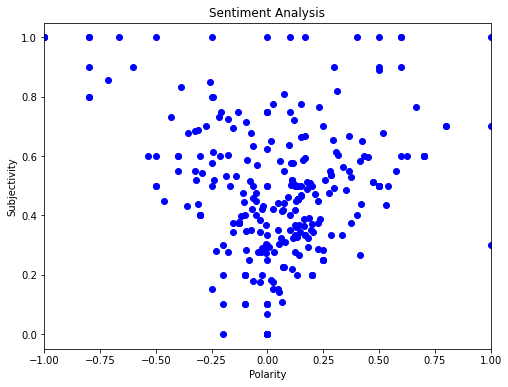

In [91]:
# plotting scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


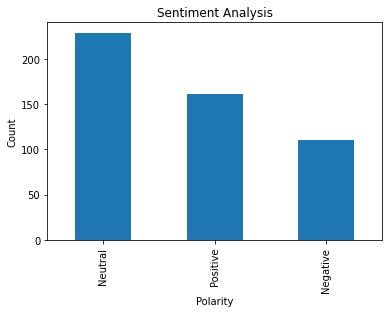

In [92]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()